In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:110% !important; }</style>"))

# Modeling Incidence Rates with GLMs

  
<br>
 
James D. Triveri     
2019-02-14


# Introduction

>In practice, we do not know the values of a proposed model's parameters, but we do know the data. We use the likelihood function to observe how the function changes for different parameter values while holding the data fixed.     
<br>
We can make use of this to judge which values of the parameters lead to greater relative chances for the sample to occur. Larger values of the likelihood correspond to values of the parameters that are relatively better supported by the data.    
<br>
In short, ***the underlying goal of a likelihood is to determine which parameters make the given data most likely***. 


## Maximum Likelihood Review


>The joint density of $n$ independently distributed observations $\mathbf{y} = (y_{1}, \cdots, y_{n})^{T}$ is given by:<br><br>
$$
f(\mathbf{y}|\mathbf{\beta}) = \prod_{i=1}^{n} f_{i}(y_{i}|\mathbf{\beta})
$$


## Maximum Likelihood Review

>When this expression is interpreted as a function of unknown $\beta$ given known data $y$, we obtain the *likelihood* function:<br><br>
$$
L(\mathbf{\beta}|\mathbf{y}) = \prod_{i=1}^{n} f_{i}(y_{i}|\mathbf{\beta})
$$
<br>


## Maximum Likelihood Review

>Solving the likelihood equation can be difficult. This can be partially alleviated by logging the likelihood expression, arriving at an expression for the *log-likelihood*:<br><br>
$$
\mathcal{L}(\mathbf{\beta}|\mathbf{y}) = \sum_{i=1}^{n} f_{i}(y_{i}|\mathbf{\beta})
$$
<br>


## Poisson Estimating Equations

>A linear model can be fit by solving closed form equations. In the case of the OLS, we can maximize the log-likelihood and find an analytical solution directly.<br><br> 
Unfortunately, that cannot be done with Generalized Linear Models including Poisson regression. Instead, an iterative approach such as Newton-Raphson or Iterative Reweighted Least Squares (IRLS) is used.<br><br>  
This is a consequence of the fact that the weight matrix $W$, and the working response $z$, change at each iteration. 
<br>

## Poisson Estimating Equations

>Recall that the Poisson probability density function with mean $\mu$ is defined as:<br><br>          
$$
f(y) = \frac{\mu^{y} e^{-\mu}}{y!}
$$
<br>      

## Poisson Estimating Equations

>For a dataset with $n$ observations assumed to follow a Poisson distribution, with each observation having mean parameter $\mu_{i}$, the likelihood is given by:<br><br>         
$$ 
L = \prod_{i=1}^{n} \frac{\mu_{i}^{y}e^{-\mu_{i}}}{y_{i}!},
$$
<br><br>
and similarly the log-likelihood as:<br><br> 
$$
\mathcal{L} = \sum_{i=1}^{n} y_{i} Ln(\mu_{i}) - \mu_{i} - Ln(y_{i}!)
$$
<br>


## Poisson Estimating Equations

>Every GLM has an associated link function, which specifies the relationship between the linear predictor and the mean of the distribution function. For the Poisson GLM is the ***log link***:<br><br> 
$$
Ln(\mu_{i}) = \eta_{i} = x_{i}^{T}\beta
$$
<br>


## Poisson Estimating Equations

>Then the *inverse link* is the transformation required to obtain the mean. For Poisson model, this is the exponential function:<br>       
$$
\mu_{i} = e^{\eta_{i}} = e^{x_{i}^{T}\beta}
$$
<br>

>We can substitute this expression for $\mu_{i}$ into the Poisson log-likelihood equation, resulting in:<br><br>      
$$
\mathcal{L} = \sum_{i=1}^{n} \big(y_{i} (x_{i}^{T}\beta)  - exp(x_{i}^{T}\beta) - Ln(y_{i}!)\big)
$$
<br>

>The ***gradient vector*** (score) is the first derivative of the log-likelihood function with respect to $\beta$:<br><br>        
$$
\frac{\partial \mathcal{L}}{\partial \beta} = \sum_{i=1}^{n} \big((y_{i} - exp(x_{i}^{T}\beta))x_{i}\big)
$$
<br>
This expression is set to 0 and solved to obtained the maximum likelihood estimating equations. 
<br>


>The ***Hessian matrix*** is calculated as the second derivative of the log-likelihood function and is negative definite for $\beta$. It can be 
expressed as:<br><br>     
$$
\frac{\partial^{2} \mathcal{L}}{\partial \beta \partial \beta^{T}} = -\sum_{i=1}^{n} \big(exp(x_{i}^{T}\beta)\big)x_{i}x_{j}^{T}
$$
<br>



>Estimation of the maximum likelihood covariance matrix is based on the negative inverse of the Hessian:<br><br> 
$$
\sum = -H^{-1} = \Bigg[\sum_{i=1}^{n} \big(exp(x_{i}^{T}\beta)\big)x_{i}x_{j}^{T} \Bigg]^{-1}
$$
<br><br>
This is computed from the last iteration of the estimation procedure. 
<br>


## IRLS Algorithm Walkthrough
<br>   

>- $X$ is a n-by-p design matrix                        
- $y$ is a n-by-1 vector representing the response            
- $\text{offset}$ is a n-by-1 vector representing the exposure           -$\mu$ is a n-by-1 vector representing the mean of each observation      
- $\eta$ is a n-by-1 vector representing the linear component, $\eta = Ln(\mu)$        
- $W$ is a n-by-n diagonal matrix with each value equal to $\mu$ (weight matrix)     
- $z$ is a n-by-1 vector representing the working response               
- $\epsilon$ represents the change in deviance below which iteration will terminate      
<br>     


##  Pseudocode: Variable Initialization
<br>

>- $\qquad \text{deviance} = 0$      
- $\qquad \mu = \text{mean(y)}$    
- $\qquad \eta = Ln(\mu)$    
- $\qquad epsilon = .0001$   
- $\qquad \Delta \text{deviance}$ = $\infty$     
<br>    


**WHILE** $|\Delta \text{deviance}| \gt \epsilon$:

>$\qquad W$ = diag($\mu$)
<br>    
$\qquad z$ = $\eta + \frac{y - \mu}{\mu} - \text{offset}$
<br>    
$\qquad \beta = (X^{T}WX)^{-1}X^{T}Wz$   
<br>
$\qquad \eta = X\beta + \text{offset}$      
<br>
$\qquad \mu = exp(\eta)$                      
<br>
$ \qquad \text{deviance}_{0} = \text{deviance}$
<br>  
$ \qquad \text{deviance} = 2 \sum \big(yLn(y/\mu) - (y-\mu)\big)$
<br>  
$ \qquad \Delta \text{deviance} = |\text{deviance} - \text{deviance}_{0}|$
<br>


## Coefficient Estimates
<br>  


>The expression:<br>  
$$
\beta = (X^{T}WX)^{-1}X^{T}Wz
$$ 
<br>
Determines the maximum likelihood parameter estimates. This differs from the least squares normal equations:<br>      
$$
(X^{T}X)^{-1}X^{T}y
$$ 
<br>
by weight matrix $W$ and working response $z$.

## Sample Implementation
<br>

>What follows is a custom implementation of Iterative Reweighted Least Squares which predicts incidence based on explanatory variables `GENDER` and `AGE_CATEGORY`.
<br>


In [1]:
"""
IRLS pre-processing and setup. 
"""
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from numpy.random import RandomState
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import special
from scipy import stats
from numpy.linalg import inv

pd.set_option('display.max_columns', 10000)
pd.set_option('display.width', 50000)
np.set_printoptions(suppress=True, precision=5)
pd.options.mode.chained_assignment = None

dforiginal      = pd.read_csv("U:/Repos/LTC/Incidence_Model/Datasets/dfgrpd.csv")
cat_fields      = ["GENDER", "AGE_CATEGORY"]
dfinit_         = dforiginal[cat_fields + ["INCIDENCE_MNTH", "EXPOSURE"]]
dfinit          = pd.get_dummies(dfinit_, columns=cat_fields, drop_first=True)
dfinit.columns  = [i.upper() for i in dfinit.columns]
response_fields = ["INCIDENCE_MNTH", "EXPOSURE"]
design_fields   = list(set(dfinit.columns).difference(set(response_fields)))
dfgrpd          = dfinit.groupby(design_fields, as_index=False).sum()
offset          = dfgrpd.EXPOSURE.values.reshape(dfgrpd.EXPOSURE.values.size, 1)
Xinit           = dfgrpd[design_fields]
Xintercept      = np.ones(Xinit.shape[0]).reshape(Xinit.shape[0], 1)
X               = np.hstack([Xintercept, Xinit])
y               = dfgrpd.INCIDENCE_MNTH.values.reshape(Xinit.shape[0], 1)


def deviance(y, mu):
    """
    Compute Poisson deviance.
    """
    y  = y.ravel().tolist()
    mu = mu.ravel().tolist()
    def f(yi, mui):
        return(yi * np.log(yi / mui) - (yi - mui))
    v = np.asarray([0 if (i==0 or j==0) else f(i, j)  for i, j in zip(y, mu)])
    return(2 * v.sum())


def likelihood(y, mu):
    """
    Compute Poisson likelihood.
    """
    v = y * np.log(mu) - mu - np.log(special.factorial(y))
    return(np.exp(v).sum())

                                     
def loglikelihood(y, mu):
    """
    Compute Poisson log-likelihood.
    """
    y  = y.ravel()
    mu = mu.ravel()
    def f(yi, mui):
        return(yi * np.log(mui) - mui - np.log(special.factorial(yi)))
    v = np.asarray([0 if i==0 else f(i, j) for i, j in zip(y, mu)])
    return(v.sum())



coeffs = list()  
loglik = list()
devlst = list()
tol    = .00001
ddev   = np.Inf
mu0    = (y + y.mean()) / 2
eta0   = np.log(mu0)
mu0    = np.exp(eta0)  
dev0   = deviance(y=y, mu=mu0)
llk0   = loglikelihood(y=y, mu=mu0)
fsi    = 0           # Fisher scoring iteration counter


# Append initial deviance, loglikelihood and parameter estimates.
devlst.append(dev0); loglik.append(llk0)



while np.abs(ddev) > tol:
    
    fsi+=1
    
    # Compute updated W, working response, coeffs, linear component and mean.
    W   = np.diag(np.ones(X.shape[0])) * mu0
    z   = (eta0 + ((y - mu0) / mu0) - np.log(offset)).reshape(y.size, 1)
    B   = inv((X.T @ W @ X)) @ (X.T @ W @ z)
    eta = X @ B.reshape(B.size, 1) + np.log(offset)
    mu  = np.exp(eta).reshape(eta.size, 1)
    
    # Compute updated deviance.
    dev  = deviance(y=y, mu=mu)
    llk  = loglikelihood(y=y, mu=mu)
    ddev = dev0 - dev
    vcov = inv((X.T @ W @ X))
    mu0, eta0, llk0, dev0 = mu, eta, llk, dev

    # Append updated parameters, loglikelihood and deviance.
    devlst.append(dev0); loglik.append(llk0); coeffs.append(B)

    
print("\n[=== Summary =====================================================]\n")
print(f"Fisher Scoring Iterations: {fsi}\n")
print("Deviance:\n")
for j in enumerate(devlst): print(j)
print("")
print("Loglikelihood:\n")
for k in enumerate(loglik): print(k)
print("")
print("Variance-Covariance Matrix:\n")
print(vcov)
print("\n[=================================================================]\n")
print("")



[=== Summary =====================================================]

Fisher Scoring Iterations: 5

Deviance:

(0, 41.74433176089332)
(1, 6.506441615556424)
(2, 1.5402972256144585)
(3, 1.1665754974814875)
(4, 1.1622359769727921)
(5, 1.1622352195014385)

Loglikelihood:

(0, -44.33480519279277)
(1, -26.715860120124326)
(2, -24.232787925153332)
(3, -24.045927061086836)
(4, -24.043757300832507)
(5, -24.04375692209686)

Variance-Covariance Matrix:

[[ 0.16898 -0.16648 -0.16628 -0.16692 -0.16624 -0.00638]
 [-0.16648  0.17995  0.16663  0.16659  0.16663 -0.00034]
 [-0.16628  0.16663  0.18552  0.16656  0.16666 -0.00089]
 [-0.16692  0.16659  0.16656  0.17752  0.16656  0.00084]
 [-0.16624  0.16663  0.16666  0.16656  0.20833 -0.001  ]
 [-0.00638 -0.00034 -0.00089  0.00084 -0.001    0.01718]]

[=================================================================]




### Summary Output Description

>- **`VARIABLE`**: The name of the estimated parameter.          
<br>
- **`ESTIMATE`**: The parameter estimate/model coefficient resulting from the running of IRLS.              
<br>
- **`STDERROR`**: The uncertainty in the parameter estimate.     
<br>
- **`Z-VALUE`**: Represents the ratio of `ESTIMATE / STDERROR`.     
<br>
- **`P(>|z|)`**: Probability of observing the outcome if the coefficient was not significantly different from 0.   
<br>


In [2]:
##### Model Coefficients and Standard Errors ######
custom_coeffs = coeffs[-1].ravel()
custom_params = pd.DataFrame({
    "VARIABLE":["INTERCEPT"] + Xinit.columns.tolist(),
    "ESTIMATE":coeffs[-1].T.ravel(),
    "STDERROR":np.sqrt(np.diagonal(vcov)),
    "Z-VALUE" :(coeffs[-1].T.ravel() / np.sqrt(np.diagonal(vcov))),
    "P(>|z|)" :stats.norm.cdf((coeffs[-1].T.ravel() / np.sqrt(np.diagonal(vcov))))
    })
custom_params

,VARIABLE,ESTIMATE,STDERROR,Z-VALUE,P(>|z|)
0,INTERCEPT,-4.883229,0.411070,-11.879299,7.581672e-33
1,AGE_CATEGORY_>80_&_<=85,2.478871,0.424202,5.843607,1.000000e+00
2,AGE_CATEGORY_>75_&_<=80,2.127327,0.430722,4.938980,9.999996e-01
3,AGE_CATEGORY_>85,2.774092,0.421329,6.584151,1.000000e+00
4,AGE_CATEGORY_>70_&_<=75,1.652200,0.456434,3.619801,9.998526e-01
5,GENDER_MALE,0.179399,0.131091,1.368506,9.144231e-01


### Visualizing Model Estimates
<br>

>Iterative Reweighted Least Squares always returns parameter estimates that correspond to the maximized log-likelihood for the given collection of explanatory variables. Each new estimate should show the log-likelihood increasing and a corresponding decrease in deviance:


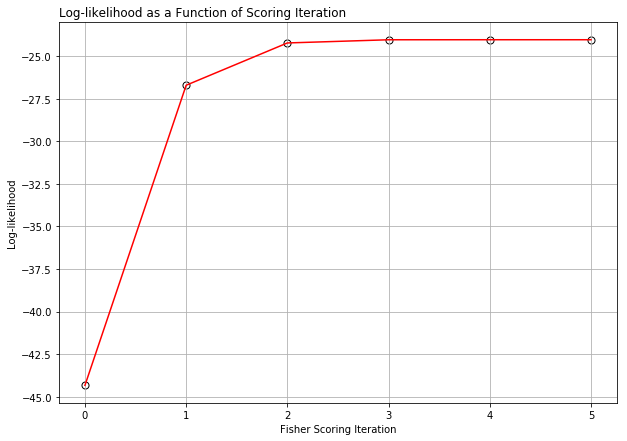

In [3]:
##### Plot log-likelihood as a function of Fisher Scoring iteration #####
x0, y0 = zip(*enumerate(loglik))

plt.figure(figsize=(10, 7))
plt.scatter(x0, y0, marker="o", edgecolor="#000000", s=50, color="#FFFFFF")
plt.title("Log-likelihood as a Function of Scoring Iteration", color="#000000", loc="left")
plt.plot(x0, y0, color="#FF0000", linewidth=1.5)
plt.xlabel("Fisher Scoring Iteration")
plt.ylabel("Log-likelihood")
plt.grid(True)
plt.show()

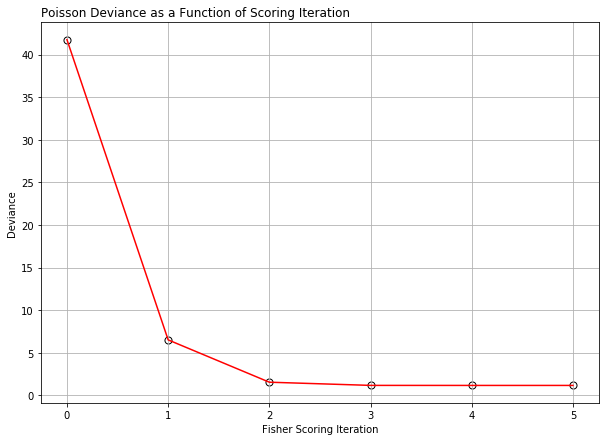

In [4]:
##### Plot Deviance as a function of Fisher Scoring Iteration #####
x1, y1 = zip(*enumerate(devlst))
plt.figure(figsize=(10, 7))
plt.scatter(x1, y1, marker="o", edgecolor="#000000", s=50, color="#FFFFFF")
plt.title("Poisson Deviance as a Function of Scoring Iteration", color="#000000", loc="left")
plt.plot(x1, y1, color="#FF0000", linewidth=1.5)
plt.xlabel("Fisher Scoring Iteration")
plt.ylabel("Deviance")
plt.grid(True)
plt.show()

### Custom Implementation vs. Statsmodels


>**statsmodels** is the canonical Python library for fitting GLMs. We'vwe demonstrated the parameter estimates for our custom implementation, but how do the estimates compare with statsmodels using the same data?


In [5]:
##### Statsmodels Poisson GLM fit #####

keep_fields  = ["GENDER", "AGE_CATEGORY", "INCIDENCE_MNTH", "EXPOSURE"]
dfmodel      = dforiginal[keep_fields]
dfgrpd2      = dfmodel.groupby(["GENDER", "AGE_CATEGORY"], as_index=False).sum()
formula_expr = "INCIDENCE_MNTH ~ C(GENDER) + C(AGE_CATEGORY)"

poisson_mdl  = smf.glm(
    formula=formula_expr, data=dfgrpd2, 
    family=sm.families.Poisson(link=sm.families.links.log),
    exposure=dfgrpd2["EXPOSURE"]
    ).fit()


# Bind reference to estimated model coefficients.
params = poisson_mdl.params
poisson_mdl.summary()
params

Intercept                       -4.883229
C(GENDER)[T.Male]                0.179399
C(AGE_CATEGORY)[T.>70_&_<=75]    1.652200
C(AGE_CATEGORY)[T.>75_&_<=80]    2.127327
C(AGE_CATEGORY)[T.>80_&_<=85]    2.478871
C(AGE_CATEGORY)[T.>85]           2.774092
dtype: float64

In [6]:
##### Print statsmodels parameter estimates #####
print("Statsmodels output:\n")
print(poisson_mdl.params)
print("")
print("JDT output:\n")
print(custom_params[["VARIABLE","ESTIMATE"]])


Statsmodels output:

Intercept                       -4.883229
C(GENDER)[T.Male]                0.179399
C(AGE_CATEGORY)[T.>70_&_<=75]    1.652200
C(AGE_CATEGORY)[T.>75_&_<=80]    2.127327
C(AGE_CATEGORY)[T.>80_&_<=85]    2.478871
C(AGE_CATEGORY)[T.>85]           2.774092
dtype: float64

JDT output:

                  VARIABLE  ESTIMATE
0                INTERCEPT -4.883229
1  AGE_CATEGORY_>80_&_<=85  2.478871
2  AGE_CATEGORY_>75_&_<=80  2.127327
3         AGE_CATEGORY_>85  2.774092
4  AGE_CATEGORY_>70_&_<=75  1.652200
5              GENDER_MALE  0.179399
